In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from PIL import Image
from IPython import display
import time

datapath = 'dataset/full_emoji.csv'
df = pd.read_csv(datapath)
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [2]:
def toimg(img_url):
    request.urlretrieve(img_url, 'img')
    img = Image.open('img')
    return img

def imgtoarray(img_url):
    try:
        img = toimg(img_url)
        return np.asarray(img)
    except TypeError:
        return None

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
texts = df['name'][:100].values
len(texts)

100

In [5]:
texts[:5]

array(['grinning face', 'grinning face with big eyes',
       'grinning face with smiling eyes',
       'beaming face with smiling eyes', 'grinning squinting face'],
      dtype=object)

In [6]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(texts)
word_dic = tokenizer.word_index
vocab_size = len(word_dic)
vocab_size

120

In [7]:
sequences = tokenizer.texts_to_sequences(texts)
sequences[:10]

[[6, 1],
 [6, 1, 2, 26, 4],
 [6, 1, 2, 3, 4],
 [27, 1, 2, 3, 4],
 [6, 12, 1],
 [6, 1, 2, 7],
 [13, 14, 28, 29, 30],
 [1, 2, 31, 15, 32],
 [16, 3, 1],
 [33, 34, 1]]

In [8]:
padded = pad_sequences(sequences)
padded[:10]

array([[ 0,  0,  0,  6,  1],
       [ 6,  1,  2, 26,  4],
       [ 6,  1,  2,  3,  4],
       [27,  1,  2,  3,  4],
       [ 0,  0,  6, 12,  1],
       [ 0,  6,  1,  2,  7],
       [13, 14, 28, 29, 30],
       [ 1,  2, 31, 15, 32],
       [ 0,  0, 16,  3,  1],
       [ 0,  0, 33, 34,  1]], dtype=int32)

In [9]:
texts_vec = np.asarray(padded)
texts_vec.shape

(100, 5)

In [10]:
samp = np.asarray([2, 4])
tf.concat([samp, texts_vec[0]], axis=0)

Metal device set to: Apple M1 Max


2022-02-14 22:02:21.000604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 22:02:21.000756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(7,), dtype=int64, numpy=array([2, 4, 0, 0, 0, 6, 1])>

In [11]:
train_texts = texts_vec[:80]
test_texts = texts_vec[80:]

In [12]:
google_images = []
for url in df['Google'][:100].to_list():
    google_images.append(imgtoarray(url))
google_images = google_images

In [13]:
# google_images = google_images / 255.0
train_img = google_images[:80]
test_img = google_images[80:]

In [14]:
def make_batch(data):
    result = []
    for i in range(0, len(data), 10):
        result.append(np.asarray(data[i:i+11]))
    return np.asarray(result)
train_img = make_batch(train_img)/ 255.0
test_img = make_batch(test_img)/ 255.0
train_texts = make_batch(train_texts)
test_texts = make_batch(test_texts)

/var/folders/9_/rnj5svk11p1157tkdv28yb6r0000gn/T/ipykernel_86300/1385172173.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


In [15]:
train_texts[0].shape

(11, 5)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [17]:
class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim, len_text):
        super(CVAE, self).__init__()
        self.len_text = len_text
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(72, 72, 4)),
                tf.keras.layers.Conv2D(
                    filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim+len_text,)),
                tf.keras.layers.Dense(units=18*18*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(18, 18, 32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=64, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=32, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                # No activation
                tf.keras.layers.Conv2DTranspose(
                    filters=4, kernel_size=3, strides=1, padding='same'),
            ]
        )
    @tf.function
    def predict(self, y_texts):
        eps = tf.random.normal(shape=(len(y_texts), self.latent_dim))
        z = tf.concat([eps, y_texts], axis=1)
        return self.decode(z, apply_sigmoid=True)
    
    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim+self.len_text))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean
    
    @tf.function
    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [18]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x, x_text):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    print(z, z.shape)
    x_text = tf.cast(x_text, dtype='float32')
    x_text = tf.reshape(x_text, [-1,5])
    z_ = tf.concat([z, x_text], axis=1)
    x_logit = model.decode(z_)
    x_logit = tf.cast(x_logit, dtype='float64')
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpx_z = tf.cast(logpx_z, dtype='float32')
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, x_text, optimizer):
    """Executes one training step and returns the loss.

    This function computes the loss and gradients, and uses the latter to
    update the model's parameters.
    """
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x, x_text)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [19]:
epochs = 10000
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 10
len_text = 5

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim, len_text)

In [20]:
def generate_and_save_images(model, epoch, test_sample, y_text):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    z_ = tf.concat([z, y_text], axis=1)
    predictions = model.sample(z_)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0])
        plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('./vae_imgs/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [21]:
train_size = 80
batch_size = 20
test_size = 20

In [22]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_img:
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [23]:
for test_batch in test_texts:
    test_sample_ = test_batch[0:num_examples_to_generate, :]

2022-02-14 22:02:21.329715: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-14 22:02:21.329884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


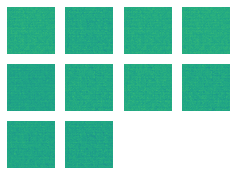

Tensor("add:0", shape=(11, 2), dtype=float32) (11, 2)


ValueError: in user code:

    File "/var/folders/9_/rnj5svk11p1157tkdv28yb6r0000gn/T/ipykernel_86300/4169519952.py", line 35, in train_step  *
        loss = compute_loss(model, x, x_text)
    File "/var/folders/9_/rnj5svk11p1157tkdv28yb6r0000gn/T/ipykernel_86300/4169519952.py", line 19, in compute_loss  *
        cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)

    ValueError: `logits` and `labels` must have the same shape, received ((11, 144, 144, 4) vs (11, 72, 72, 4)).


In [24]:
generate_and_save_images(model, 0, test_sample, test_sample_)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x, train_x_ in zip(train_img, train_texts):
        train_x = tf.cast(train_x, dtype='float64')
        train_step(model, train_x, train_x_, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for test_x, test_x_ in zip(test_img, test_texts):
        test_x = tf.cast(test_x, dtype='float64')
        loss(compute_loss(model, test_x, test_x_))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample, test_sample_)

In [ ]:
y_texts = tf.cast(texts_vec, dtype='float32')
predictions = model.predict(y_texts)
fig = plt.figure(figsize=(10, 10))

for i in range(predictions.shape[0]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(predictions[i, :, :, 0])
    plt.axis('off')

plt.show()